# AILAB + LeNER-BR
Esse planilha jupyter foi desenvolvida a fim de unir o modelo de identificação de entidades treinado em cima deu uma base de dados jurídica em língua portuguesa desenvolvida nesse [artigo](https://cic.unb.br/~teodecampos/LeNER-Br/luz_etal_propor2018.pdf) para ser utilizada pela equipe do AILAB.

In [1]:
from model.model.ner_model import NERModel
from model.model.config import Config
from nltk import word_tokenize
from nltk import data
from nltk.tokenize.punkt import PunktSentenceTokenizer
import sys

/home/dev/PythonEnviroments/ailab-researching/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dev/PythonEnviroments/ailab-researching/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dev/PythonEnviroments/ailab-researching/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dev/Pyt

## Carregando amostra de dados


In [2]:
filename = "text_test.txt"
with open(filename, 'r') as file:
    text = file.read()

print(text[:500])

"ARE","1233680","15341104761","1","PODER JUDICIARIO

JUSTIÇA FEDERAL

SEÇÂÀO JUDICIARIA DO ESPÎRITO SANTO

22 VARA FEDERAL DE CACHOEIRO DE ITAPEMIRIM

JFES
Fls 1473

PROCESSO N° 0011030-40.1998.4.02.5002 (98.0011030-5)
AUTOR(A): INCRA-INSTITUTO NACIONAL DE COLONIZACAO E REFORMA AGRARIA

RÉ(U)(S): PECUARIA MANOEL MARCONDES S/A

CERTIDAO

CERTIFICO que a petiçäo de fls. 1463 foi equivocadamente vinculada a esses
autos.

CERTIFICO ainda, que apôs consulta no Sistema Apolo, foi verificado que a
refe


In [3]:
bcolors = {
    "PESSOA": '\033[94m',
    "TEMPO": '\033[92m',
    "LOCAL": '\033[93m',
    "ORGANIZACAO": '\033[91m',
    "JURISPRUDENCIA": '\033[35m',
    "LEGISLACAO": '\033[36m',
    "ENDC": '\033[0m',
    "O": ""
}

# create instance of config
config = Config()

# build model
model = NERModel(config)
model.build()
model.restore_session(config.dir_model)

tokenizer = PunktSentenceTokenizer()



tokenizer.train(text)
sentences = tokenizer.tokenize(text)

for sentence in sentences:
    words = word_tokenize(sentence, language='portuguese')
    preds = model.predict(words)
    for index, word in enumerate(words):
        if preds[index][0:2] in ['B-', 'I-', 'E-', 'S-']:
            preds[index] = preds[index][2:]
        print(bcolors[preds[index]] +
              word + bcolors["ENDC"], end=' ')
    print('\n')

Instructions for updating:
Use the retry module or similar alternatives.


From /home/dev/PythonEnviroments/ailab-researching/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:198: retry (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Use the retry module or similar alternatives.
/home/dev/PythonEnviroments/ailab-researching/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
Initializing tf session
Reloading the latest trained model...


INFO:tensorflow:Restoring parameters from model/results/prototype_revised/model.weights/


Restoring parameters from model/results/prototype_revised/model.weights/


`` ARE '' , '' 1233680 '' , '' 15341104761 '' , '' 1 '' , '' PODER JUDICIARIO JUSTIÇA FEDERAL SEÇÂÀO JUDICIARIA DO ESPÎRITO SANTO 22 VARA FEDERAL DE CACHOEIRO DE ITAPEMIRIM JFES Fls 1473 PROCESSO N° 0011030-40.1998.4.02.5002 ( 98.0011030-5 ) AUTOR ( A ) : INCRA-INSTITUTO NACIONAL DE COLONIZACAO E REFORMA AGRARIA RÉ ( U ) ( S ) : PECUARIA MANOEL MARCONDES S/A CERTIDAO CERTIFICO que a petiçäo de fls . 

1463 foi equivocadamente vinculada a esses autos . 

CERTIFICO ainda , que apôs consulta no Sistema Apolo , foi verificado que a referida petiçäo jà se encontra-se juntada aos autos do processo n° 0103334- 96.2014.4.02.5002 , ao qual ela se refere . 

Cachoeiro de Itapemirim-ES , 24 de abril de 2015 . 

( Assinado Eletronicamente ) VANESSA DA SILVA MACHADO - matricula ES10.808 Servidor ( a ) Encarregado ( a ) Documento No : 110022-60-0-1473-1-473645 - consulta à autenticidade do documento através do site http : /www2.jfes.jus.br/jfes/d004 . '' 

`` ARE '' , '' 1233680 '' , '' 15341104761 

GUILHERME DIEFENTHAELER Correlaçäo : Pelo Originärio PROCESSO ' : 2015.00.00.003790-0 CNJ N° : 0003790-72.2015.4.02.0000 Data Distribuiçäo : 16/04/2015 18:28 Orgäo Julgador : 8 Turma Especializada Pâägina 003 Emitido em 19/05/2015 17:13 Local : Cachoeiro de ltapemirim Vara : 2VF-CAC UF : ES Local : Cachoeiro de ltapemirim Vara : 2VF-CAC UF : ES Local : Cachoeiro de ltapemirim Vara : 2VF-CAC UF : ES Local : Cachoeiro de ltapemirim Vara : 2VF-CAC UF : ES Local : Vitoria Vara : 6VFCI-VIT UF : ES Local : Cachoeiro de ltapemirim Vara : 2VF-CAC UF : ES Local : Cachoeiro de ltapemirim Vara : 2VF-CAC UF : ES Local : Cachoeiro de ltapemirim Vara : 2VF-CAC UF : ES Local : Cachoeiro de ltapemirim Vara : 2VF-CAC UF : ES Local : Vitoria Vara : 6VFCI-VIT UF : ES Agvte : INCRA-INSTITUTO NACIONAL DE COLONIZACAO E REFORMA AGRARIA Agvdo : CILAS VIEIRA E OUTRO ( S ) TRF2 Fls 1477 Assinado eletronicamente . 

Certificaçäo digital pertencente a Cristina Mateus Caneda . 

Documento No : 271828-62-0-1475-6-9

TRF2 Diretor da Distribuiçäo Fls 1482 epeploquenezq'snfznylenod//dnu 8US op SEA OJUELUNOOP OP SPEPIOHUSNE E EJNSUOO - G0968B-C-|8pL-0-E9-8CBLZS ‘ ON OJUELUNOOQ ] “ epeueg she eUNSH9 e ajuooueped eôlp 0258941189 ‘ aJUELIPOIUO1JE|S OPEUISSY '' '' ARE '' , '' 1233680 '' , '' 15341104761 '' , '' 11 '' , '' PODER JUDICIARIO TRIBUNAL REGIONAL FEDERAL DA 2* REGIAO 8° Turma Especializada Processo n° 0011030-40.1998.4.02.5002 ( 1998.50.02.011030-2 ) CERTIDÀAO Certifico que , em cumprimento à Portaria n° 08/2008 , da Presidência desta Turma , procedi à conferência da autuaçäo dos presentes autos verificando , s.m.j. , equfvoco quanto a näo constar a anotaçäo de duplo grau ( sentença de fls.1343/1361 ) no presente feito . 

O referido é verdade e dou fé . 

Rio de Janeiro , 21 de maio de 2015 ( assinado eletronicamente — alfnea ‘ a ’ , inciso III , $ 2° , art . 

1° da Lei 11.419/2006 ) KÂTIA MALAVOTA TELLES MATRICULA 11546 - ASSISTENTE IV TRF2 Fls 1483 Assinado eletronicamente . 

Certificaçäo d

A Primeiràa Seçäo desta Corte , no julgamento do Recurso Especial Representativo da Controvérsia 1.309.529/PR , firmou o entendimento de que , embora { a Lei 9.528/97 näo possa operar de maneira retroativa , a data de sua ediçäo ( 28.6.1997 ) deve ser o marco inicial para à contagem do prazo decadencial para a revisäo de beneficios concedidos antes de sua vigência . 

D . 

Como bem pontua o Min . HERMAN BENJAMIN , por ato de concessäo deve-se entender toda manifestaçäo exarada pela Autarquia Previdenciéria sobre o pedido administrativo de beneficio previdenciério e as circunstâncias fético-juridicas envolvidas no ato , como as relativas aos requisitos e aos critérios de cälculo do beneficio , do que pode resultar o deferimento ou indeferimento do pleito . 

Documento eletrônico VDA15722960 assinado eletronicamente nos termos do Art.1° $ 2° inciso Ill da Lei 11.419/2006 Signatärio ( a ) : MINISTRO Napoleäo Nunes Maia Filho Assinado em : 15/12/2016 10:02:19 Publicaçäo no DJe/STJ n° 2115

Min . Mauro Campbell Marques , Segunda Turma , DJ 17.11.11 e AgRg no AREsp 110.072/PR , Rel . 

Min . Sidnei Benetti , Terceira Turma , DJ 12.04.12 ) '' '' ( STJ , AgRg no REsp 1.167.494/PR , Rel . 

Ministro CASTRO MEIRA , SEGUNDA Documento eletrônico VDA15702923 assinado eletronicamente nos termos do Art.1° $ 2° inciso Ill da Lei 11.419/2006 Signatärio ( a ) : MINISTRA Regina Helena Costa _Assinado em : 12/12/2016 19:31:17 Publicaçäo no DJe/STJ n° 2115 de 19/12/2016 . 

Cédigo de Controle do Documento : 450C12A3-F2FF-476E-A391-DCF33940CBD6 '' '' ARE '' , '' 1234862 '' , '' 15341198078 '' , '' 3 '' , '' ( e-STJ F1.487 ) TURMA , DJe de 11/09/2012 ) . 

Em igual sentido : STJ , AgRg no REsp 1.555.257/RS , Rel . 

Ministra DIVA MALERBI ( Desembargadora Convocada do TRF/3* % Regiäo ) , SEGUNDA TURMA , DJe de 05/05/2016 ; EDcl no AgRg no REsp 1.124.215/SP , Rel . 

Ministro HUMBERTO MARTINS , SEGUNDA TURMA , Die de 26/04/2016 . 

Il . 

Agravo Interno näo conhecido . 

( Agint no AREsp 589

© Plenärio do Supremo Tribunal Federal , no julgamento do RE n . 630.501/RS , submetido à repercussäo geral , sedimentou entendimento no sentido de que o segurado possui direito adquirido ao cälculo da renda mensal inicial da aposentadoria de acordo com a legislaçäo vigente à época do preenchimento dos requisitos exigidos para a sua concessäo , respeitada a decadéncia do direito à revisäo e a prescriçäo quanto às parcelas vencidas , em julgado assim ementado : APOSENTADORIA - PROVENTOS - CÂLCULO . 

Cumpre observar o quadro mais favorâvel ao beneficiärio , pouco importando o decesso remuneratério ocorrido em data Documento eletrônico VDA15224794 assinado eletronicamente nos termos do Art.1° $ 2° inciso Ill da Lei 11.419/2006 Signatärio ( a ) : MINISTRA Regina Helena Costa _Assinado em : 03/10/2016 19:51:10 Publicaçäo no DJe/STJ n° 2070 de 10/10/2016 . 

Cédigo de Controle do Documento : A555A582-FB44-4F02-80D0-4CA8EC16E7AB '' '' ARE '' , '' 1234862 '' , '' 15341227063 '' , '' 3 '' , ''

Cédigo de Controle do Documento : A555A582-FB44-4F02-80D0-4CA8EC16E7AB '' '' ARE '' , '' 1234862 '' , '' 15341227063 '' , '' 5 '' , '' ( e-STJ F1.450 ) de 15.08.2016 . Isto posto , com fundamento no art . 

932 , V , do Côdigo de Processo Civil e art . 

34 , XVIII c , do Regimento Interno desta Corte , DOU PROVIMENTO ao Recurso Especial , para , tâäo somente , afastar a decadência e determinar o retorno dos autos ao Tribunal de origem para que prossiga no julgamento do feito . 

Publique-se e intimem-se . 

Brasilia ( DF ) , 03 de outubro de 2016 . 

MINISTRA REGINA HELENA COSTA Relatora Documento eletrônico VDA15224794 assinado eletronicamente nos termos do Art.1° $ 2° inciso Ill da Lei 11.419/2006 Signatärio ( a ) : MINISTRA Regina Helena Costa _Assinado em : 03/10/2016 19:51:10 Publicaçäo no DJe/STJ n° 2070 de 10/10/2016 . 

Cédigo de Controle do Documento : A555A582-FB44-4F02-80D0-4CA8EC16E7AB '' '' RE '' , '' 1234619 '' , '' 15341165385 '' , '' 1 '' , '' ( e-STJ F1.467 ) Agint no

Cédigo de Controle do Documento : DFFCEDBC-B514-4FC6-93EF-DF6D0003BEF9 '' '' RE '' , '' 1234619 '' , '' 15341165385 '' , '' 3 '' , '' ( e-STJ F1.469 ) Diante disso , requer `` '' a reforma da r. decisäo ora agravada , uma vez que decaiu o direito da parte autora de pleitear a revisäo de seu beneficio previdenciärio , o qual foi concedido hâ mais de dez anos antes do ajuizamento da vertente açäo judicial '' '' ( fl . 430e ) . 

Intimada ( fl . 482e ) , a parte agravada apresentou resposta ( fls . 

435/464e ) , defendendo `` '' o TOTAL IMPROVIMENTO do agravo do ente federal '' '' . 

Tendo em conta os fundamentos da parte agravante , bem como a faculdade prevista no art . 

259 do RISTJ , reconsidero a decisäo agravada e passo , a seguir , a um novo exame do Recurso Especial . 

Trata-se de Recurso Especial , fundamentado nas alineas a e c do permissivo constitucional , interposto ! 

por MARIO ITALO RUFATTO , em 01/04/2016 , contra acordäo do Tribunal Regional Federal da 4 Regiäo , em 

Considerando que , conforme acima foi ressaltado , o tema controvertido nestes autos diz respeito à matéria afetada , o julgamento imediato do Recurso Especial seria prematuro , e , desse modo , os autos devem ser devolvidos ao Tribunal de origem , para que , uma vez concluido , nesta Corte , o julgamento , seja o inconformismo apreciado na forma do art . 

1.040 do CPC/2015 . 

No julgamento de caso anälogo , jâ decidiu esta Corte : '' '' PROCESSUAL CIVIL . 

AGRAVO REGIMENTAL INTERPOSTO EM FACE DE DECISÂO QUE DETERMINOU A DEVOLUÇÂO DOS AUTOS '' '' AOTRIBUNALDEORIGEMNPENDÉNCIA DE JULGAMENTO DE RECURSO ESPECIAL REPRESENTATIVO DA CONTROVÉRSIA , NO QUAL SE DISCUTE QUESTAÂO IDÉNTICA . 

PROVIDÉNCIA QUE NÂO ENSEJA PREJUIZO A NENHUMA DAS PARTES . 

NECESSIDADE DE SE OBSERVAR OS OBJETIVOS DA LEI 11.672/2008 . 

1 . 

O Cédigo de Processo Civil admite a interposiçäo de agravo regimental apenas quando o Relator trata sobre a viabilidade ou näo do recurso ( nega seguimento ou dà provimento ao r

I. Brasilia ( DF ) , 07 de dezembro de 2016 . 

MINISTRA ASSUSETE MAGALHÂES Relatora Documento eletrônico VDA15706837 assinado eletronicamente nos termos do Art.1° $ 2° inciso Ill da Lei 11.419/2006 Signatärio ( a ) : MINISTRA Assusete Magalhäes Assinado em : 13/12/2016 20:33:32 Publicaçäo no DJe/STJ n° 2113 de 15/12/2016 . 

Cédigo de Controle do Documento : DFFCEDBC-B514-4FC6-93EF-DF6D0003BEF9 '' '' RE '' , '' 1234619 '' , '' 15341165373 '' , '' 1 '' , '' ( e-STJ F1.414 ) S upaio T ribunal de ] udig RECURSO ESPECIAL N° 1.608.172 - RS ( 2016/0161127-0 ) RELATORA : MINISTRA ASSUSETE MAGALHÂES RECORRENTE : MARIOITALO RUFATTO ADVOGADO : ROSE MARY GRAHL E OUTRO ( S ) RECORRIDO : INSTITUTO NACIONAL DO SEGURO SOCIAL DECISÂO Trata-se de Recurso Especial , fundamentado nas alineas a e c do permissivo constitucional , interposto por MARIO ITALO RUFATTO , em 01/04/2016 , contra acordäo do Tribunal Regional Federal da 4 Regiäo , em juizo de retraçäo , assim ementado : '' '' PREVIDENCIARIO . 

DE

De inicio , deve-se partir das premissas estabelecidas pelo Supremo Tribunal Federal em repercussäo geral , in verbis : a ) näo hà prazo decadencial para a formulaçäo do requerimento inicial de concessäo de beneficio previdenciärio , que corresponde ao exercicio de um direito fundamental relacionado à minima segurança social do individuo ; b ) a instituiçäo de um prazo decadencial de dez anos para a revisäo |dos beneficios jâ concedidos 6 compativel com a Constituiçäo Federal . 

Trata-se de uma conciliaçäo razoävel entre os interesses individuais envolvidos e os principios da segurança juridica e da solidariedade social , dos quais decorre a necessidade de se preservar o equilibrio atuarial do sistema em beneficio do conjunto de segurados atuaise futuros . 

Ass i m , a decadência atinge '' '' apenas a pretensäo de rever beneficio previdenciärio , ou seja , alcança a discussäo da graduaçäo econômica quando este jà foi concedido , pois o direito fundamental ao beneficio previdenciärio 

'A Segunda Turma desta Corte , em decisäo unânime , firmou entendimento no sentido de que ‘ a decadência prevista no artigo 103 da Lei 8.213/91 näo alcança questôes que näo restaram resolvidas no ato administrativo que apreciou o pedido de concessäo do beneficio . 

Isso pelo simples fato de que , como o prazo decadencial limita a possibilidade de controle de legalidade do ato administrativo , näo pode atingir aquilo que näo foi objeto de apreciaçäo pela Administraçäo ' ( AgRg no REsp 1.407.710/PR , Rel . 

Ministro Herman Benjamin , Segunda Turma ) '' '' ( AgRg no AgRg no ARESsp 598.206/PR , Rel . 

Ministro Humberto Martins , Segunda Turma , julgado em 5/5/2015 , DJe 11/5/2015 ) . 

2 . 

Decisäo mantida . 

8 . 

Agravo regimental a que se nega provimento '' '' ( STJ , AgRg no REsp a LES CRERD CRD 2016/0161127-0 Documento Pâgina 5 de 6 Documento eletrônico VDA14647358 assinado eletronicamente nos termos do Art.1° $ 2° inciso Ill da Lei 11.419/2006 Signatärio ( a ) : MINISTRA Assuset

Sustenta.a parte recorrente , em sintese , a nàäo ocorrência.do.instituto da decadéncia , .porquanto nàäo se trata de mera revisäo de beneficio previdenciärio , mas de reconhecimento do melhor beneficio , adquirido ’ e incorporado ao seu patrimônio juridico 3 . É orelatério : Decido . 

4 . À Primeira Seçäo desta Corte , no julgamento do Recurso Especial Representativo da Controvérsia 1.309.529/PR , firmou o entendimento de que , embora a Lei 9.528/97 näo possa operar de maneira retroativa , a data de sua ediçäo ( 28.6.1997 ) deve ser o marco inicial para a contagem do prazo decadencial para a revisäo de beneficios concedidos antes de sua vigência . 

5 : Como bem pontua o Min . HERMAN BENJAMIN , por Documento eletrônico VDA15725010 assinado eletronicamente nos termos do Art.1° $ 2° inciso Ill da Lei 11.419/2006 Signatärio ( a ) : MINISTRO Napoleäo Nunes Maia Filho Assinado em : 15/12/2016 10:03:01 Publicaçäo no DJe/STJ n° 2115 de 19/12/2016 . 

Cédigo de Controle do Documento : 5FFACA

103 da Lei 8.213/91 em diversas hipéteses , como por exemplo , nas açôes que cuidam de pedido de revisäo que envolver questôes näo analisadas pela Administraçäo no momento do requerimento administrativo ; quando a revisäo esté fundada em atos posteriores ao ato de concessäo do beneficio , como no caso da revisäo que busca a adequaçäo do valor do beneficio previdenciério aos tetos Documento eletrônico VDA15724404 assinado eletronicamente nos termos do Art.1° $ 2° inciso Ill da Lei 11.419/2006 Signatärio ( a ) : MINISTRO Napoleäo Nunes Maia Filho Assinado em : 15/12/2016 10:02:11 Publicaçäo no DJe/STJ n° 2115 de 19/12/2016 . 

Cédigo de Controle do Documento : DF577818-A2DC-4282-8E3A-F64D8B575822 '' '' RE '' , '' 1234621 '' , '' 15341165591 '' , '' 3 '' , '' ( e-STJ F1.363 ) fixados pelas Emendas Constitucionais 20/1998 e 41/2003 . 

7 . 

Assim , foi decidido em Questäo de Ordem , da Primeira Seçäo , que a questäo acerca do afastamento do prazo decadencial nas açôes em que se busca à co

A Certificaçäo Digital pertence a : MAURO LUIZ CAMPBELL MARQUES Num . 1985296 - Pâg . 2 https : //www2.cjf.jus.br/pje/Processo/ConsultaDocumento/listView.seam ? nd=17060818421764800000001980736 Nümero do documento : 17060818421764800000001980736 '' '' ARE '' , '' 1223874 '' , '' 15340706533 '' , '' 4 '' , '' Conselho da Justiça Federal Turma Nacional de Uniformizaçäo Brasilia , 21 de julho de 2017 . Processo n° 0509359-02.2016.4.05.8302 PEDIDO DE UNIFORMIZAÇAO DE INTERPRETAÇAO DE LEI ( 457 ) CERTIDAO Certifico e dou fé que o/a acérdäo/decisäo retro da Turma Nacional de Uniformizaçäo transitou em julgado/decorreu o prazo em 14/07/2017 . 

Assinado eletronicamente . 

A Certificaçäo Digital pertence a : GERSON ANDRE DA SILVA E SILVA Num . 2344500 - Pâg . 1 https : //www2.cjf.jus.br/pje/Processo/ConsultaDocumento/listView.seam ? nd=17072116173883800000002339837 Nümero do documento : 17072116173883800000002339837 '' '' RE '' , '' 1234617 '' , '' 15341165152 '' , '' 1 '' , '' ( e-STJ F1.414

1.255.014/PR , Rel . 

Min . SÉRGIO KUKINA , DJe Documento eletrônico VDA14574659 assinado eletronicamente nos termos do Art.1° $ 2° inciso Ill da Lei 11.419/2006 Signatärio ( a ) : MINISTRO Napoleäo Nunes Maia Filho Assinado em : 27/06/2016 11:05:12 Publicaçäo no DJe/STJ n° 2001 de 29/06/2016 . 

Cédigo de Controle do Documento : CC288D3B-0D9B-4BF3-AC42-D76DCD9C6D0E '' '' RE '' , '' 1234617 '' , '' 15341165152 '' , '' 4 '' , '' ( e-STJ F1.417 ) 19.5.2015 ) . 

+ + + AGRAVOS REGIMENTAIS . 

RECURSOS ESPECIAIS . 

PREVIDENCIARIO . 

CÂLCULO DA RENDA MENSAL DO BENEFICIO . 

TETO INSTITUIDO PELA LEI N . 6.950/ 81 . PERIODO DENOMINADO '' '' BURACO NEGRO '' '' . 

ART . 

144 DA LEI N . 8.213/91 . 

APLICABILIDADE . 

RENDA MENSAL INICIAL . 

REVISAO . 

JUROS MORATORIOS . 

LEI 11.960/2009 . 

INCIDÉNCIA . 

AGRAVOS REGIMENTAIS PROVIDOS . 

I - À Terceira Seçâo cristalizou entendimento segundo o qual , ‘ reconhecido o direito adquirido , como postulado , ao cälculo da RMI emxdata anterior 

Cédigo de Controle do Documento : 94FDB55A-3DC0-4EF8-8A1C-3F41EC610C24 '' '' RE '' , '' 1234617 '' , '' 15341165163 '' , '' 2 '' , '' ( e-STJ F1.437 ) 4 . É orelatcrio . 

Decido . 

5 : À Primeira Seçäo desta Corte , no julgamento do Recurso Especial Representativo da Controvérsia 1.309.529/PR , firmou o entendimento de que , embora a Lei 9.528/97 näo possa operar de maneira retroativa , a data de sua ediçäo ( 28.6.1997 ) deve ser o marco inicial para à contagem do prazo decadencial para a revisäo de beneficios concedidos antes de sua vigência . 

6 . 

Como __bem pontuado _pelo Min . HERMAN BENJAMIN « por ato detconcessäo deve-sesentender toda manifestaçäo exarada/pela Autarquia Previdenciéria sobre o pedido administrativo de beneficio previdenciério e as circunstâncias fético-juridicas envolvidas no ato , como as relativas aos requisitos e aos critérios de cälculo do beneficio , do que pode resultar o deferimento ou indeferimento do pleito ( RESp . 

1.576.842/PR , Rel . 

Min . HER

PROCESSO A SER DISTRIBUIDO : 2014.50.01.003698-8 Data Prevençäo : 23/01/2015 15:37 CNJ N° : 0003698-63.2014.4.02.5001 Apte : BRAVE COMPANY COMERCIAL E IMPORTADORA LTDA E OUTRO ( S ) Apdo : OS MESMOS Classe : Apelaçäo Civel/Reexame Necessärio - Turma Espec . Il - Tributärio Assunto : 03.02.05 - IPI/ Imposto sobre Produtos Industrializados - Impostos - Tributärio CNJ N° : 0003698-63.2014.4.02.5001 Justiça Original : Seçäo Judiciäria do ES Local : Vitéria Processo Original : 2014.50.01.003698-8 Vara : 2° VFCI O Préprio : Sim UF : ES NÂO FORAM ENCONTRADOS PROCESSOS NO SISTEMA ATUAL . 

NÂO FORAM ENCONTRADOS PROCESSOS NO SISTEMA SIAPRO . 

TRF2 Fls 620 Assinado eletronicamente . 

Certificaçäo digital pertencente a Vagner de Souza Cavalcante . 

Documento No : 190792-50-0-620-1-867121 - consulta à autenticidade do documento através do site http : //portal.trf2.jus.br/autenticidade '' '' ARE '' , '' 1233686 '' , '' 15341104900 '' , '' 4 '' , '' Pägina 001 Poder Judiciärio Emitido em 23/01/20

KeyboardInterrupt: 

In [28]:
TIPOS_ENTIDADES = ['PESSOA', 'TEMPO', 'LOCAL', 'ORGANIZACAO', 'JURISPRUDENCIA', 'LEGISLACAO']
entities_bag_per_sentence_per_type = dict()
person_bag, jurisprudence_bag, time_bag = [], [], []
laws_bag, organizations_bag, localizations_bag = [], [], []
count_entidades = dict()

for tipo in TIPOS_ENTIDADES:
    count_entidades[tipo] = 0

for sentence in sentences:
    words = word_tokenize(sentence, language='portuguese')
    preds = model.predict(words)
    entitities_in_setence = dict()
    for i, word in enumerate(words):
        ''' Removendo sufixo de tipo de entidades'''
        if preds[i][0:2] in ['B-', 'I-', 'E-', 'S-']:
            preds[i] = preds[i][2:]
        if preds[i] != 'O':
            ent_type = preds[i]
            count_entidades[ent_type] += 1
            if ent_type not in entitities_in_setence.keys():
                entitities_in_setence[ent_type] = [word]
            else:
                entitities_in_setence[ent_type].append(word)
    
    ''' Separando cada bolsa de palavras por tipo de entididade '''
    if 'PESSOA' in entitities_in_setence.keys():
        person_bag.append(" ".join(entitities_in_setence['PESSOA']))
    else:
        person_bag.append(" ")
    
    if 'JURISPRUDENCIA'  in entitities_in_setence.keys():
        jurisprudence_bag.append(" ".join(entitities_in_setence['JURISPRUDENCIA']))
    else:
        jurisprudence_bag.append(" ")
    
    if 'TEMPO' in entitities_in_setence.keys():
        time_bag.append(" ".join(entitities_in_setence['TEMPO']))
    else:
        time_bag.append(" ")
    
    if 'LEGISLACAO'  in entitities_in_setence.keys():
        laws_bag.append(" ".join(entitities_in_setence['LEGISLACAO']))
    else:
        laws_bag.append(" ")
    
    if 'ORGANIZACAO'  in entitities_in_setence.keys():
        organizations_bag.append(" ".join(entitities_in_setence['ORGANIZACAO']))
    else:
        organizations_bag.append(" ")
    
    if 'LOCAL'  in entitities_in_setence.keys():
        localizations_bag.append(" ".join(entitities_in_setence['LOCAL']))
    else:
        localizations_bag.append(" ")

In [44]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import seaborn as sns
from nltk.tokenize import WordPunctTokenizer

def generate_wordcloud(df_column, figsize=(20, 8)):
    ''' Receives a single a dataframe column and
        prints on screen a wordcould of the 100
        most common words
        :args: df_column -> Dataframe, figsize -> (int, int)
    '''
    text = df_column.str.cat(sep=" ")
    wordcloud = WordCloud(
        max_words=100,
        width=900,
        height=500,
        max_font_size=350,
        collocations=False,
        normalize_plurals=False).generate(text)
    plt.figure(figsize=figsize)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
def generate_freq_dist_plot(df_column, max_words=25):
    ''' Receives a single a dataframe column and
        plots on screen a bar graph with the most
        frequent tokens and also return those tokens
        as a list.
        :args: df_column -> DataFrame, max_words -> int
        :returns: words_that_appear_the_most -> List[int]
    '''
    text = df_column.str.cat(sep=" ")
    words = WordPunctTokenizer().tokenize(text)
    words_that_apper_the_most = pd.Series(
        words).value_counts().nlargest(max_words)

    ax = sns.barplot(
        x=words_that_apper_the_most.index,
        y=words_that_apper_the_most.values)
    ax.figure.set_size_inches(20, 7)

    return words_that_apper_the_most

In [26]:
df_entities = pd.DataFrame(columns=TIPOS_ENTIDADES)
df_entities['PESSOA'] = person_bag
df_entities['TEMPO'] = time_bag
df_entities['LOCAL'] = localizations_bag
df_entities['ORGANIZACAO'] = organizations_bag
df_entities['JURISPRUDENCIA'] = jurisprudence_bag
df_entities['LEGISLACAO'] = laws_bag

In [30]:
for tipo in TIPOS_ENTIDADES:
    print("Quantidade de entidades encontradas do tipo: " + tipo + " - " + str(count_entidades[tipo]))

Quantidade de entidades encontradas do tipo: PESSOA - 3735
Quantidade de entidades encontradas do tipo: TEMPO - 2873
Quantidade de entidades encontradas do tipo: LOCAL - 734
Quantidade de entidades encontradas do tipo: ORGANIZACAO - 3463
Quantidade de entidades encontradas do tipo: JURISPRUDENCIA - 2355
Quantidade de entidades encontradas do tipo: LEGISLACAO - 8746


Entidades do tipo: PESSOA
PECUARIA MANOEL MARCONDES S/A       VANESSA DA SILVA MACHADO     PECUARIA MANOEL MARCONDES S/A             PECUARIA MANOEL MARCONDES S/A   ROGERIA BARBOSA FRANKLIN DO NASCIMENTO   PECUARIA MANOEL MARCONDES S/A   Cristina Mateus GILIO LORENCINI NETTO Cristina Mateus   GUILHERME DIEFENTHAELER Correlaçäo CILAS VIEIRA Cristina Mateus     Cristina Mateus   GUILHERME DIEFENTHAELER Correlaçäo JAIME BARRETO LIMA ARNALDO LIMA PECUARIA MANOEL MARCONDES S/A Cristina Mateus PECUARIA MANOEL MARCONDES S/A LUIZ PAULO DA SILVA ARAUJO FILHO Correlaçäo Cristina Mateus       CRISTINA MATEUS CANEDA   PECUARIA MANOEL MARCONDES S/A Cristina Mateus                                         CRISTINA MATEUS GIVALDO HENRIQUE LIBERATO   PECUARIA MANOEL MARCONDES S/A ELAINE LOPES DOS SANTOS   NAPOLEÂO NUNES MAIA FILHO JOSE JABOINSKI ROSE MARY GRAHL           JOSE JABOINSKI PREVIDENCIARIO= » PROCESSUALæGIVIL                           Napoleäo Nunes Maia Filho                       HERMAN BE

ValueError: Image size of 176538x414 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1440x504 with 1 Axes>

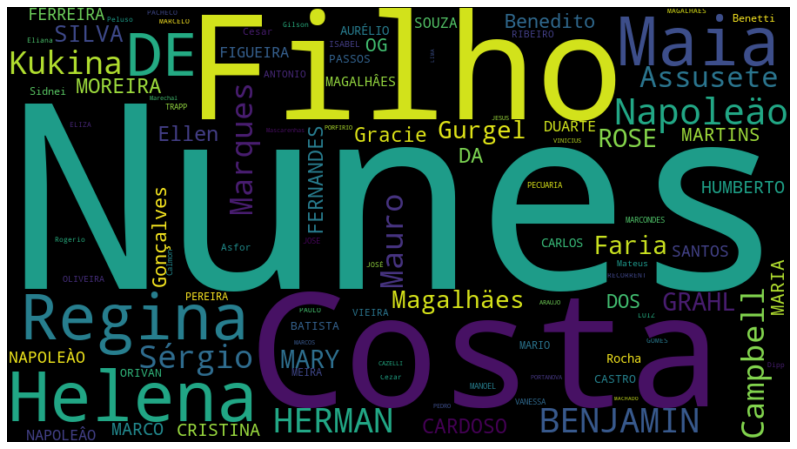

Entidades do tipo: TEMPO
      24 de abril de 2015                       24 de abril de 2015   19/05/2015 13/05/2015 01.06.04     15341104761 19/05/2015 18/07/2014 02.16.03   15341104761 16/04/2015 19/05/2015   15341104761 19/05/2015 01.06.04     15341104761 19/05/2015 24/02/1999 06/04/2000 01.06.04   18/08/2008 19/05/2015 01.06.04   15341104761 19/05/2015 13 de maio de 2015 27/04/2015 19/05/2015   01.06.04       0258941189 15341104761   21 de maio de 2015     15341104761   21 de maio de 2015     15341104761             27/04/2015 19/05/2015 22/05/2015 22/05/2015 22 de maio de 2015 01.06.04 22/05/2015   15341104761                                           15/12/2016 2115 19/12/2016 1 de agosto de 1997                 28.6.1997     15/12/2016 2115 19/12/2016                 15/12/2016 2115 19/12/2016           09 de dezembro de 2016 15/12/2016 2115 19/12/2016 15341198078               12/12/2016 2115 19/12/2016 15341198078                             17.11.11 12.04.12 12/12/2016 2115 1

ValueError: Image size of 147597x412 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1440x504 with 1 Axes>

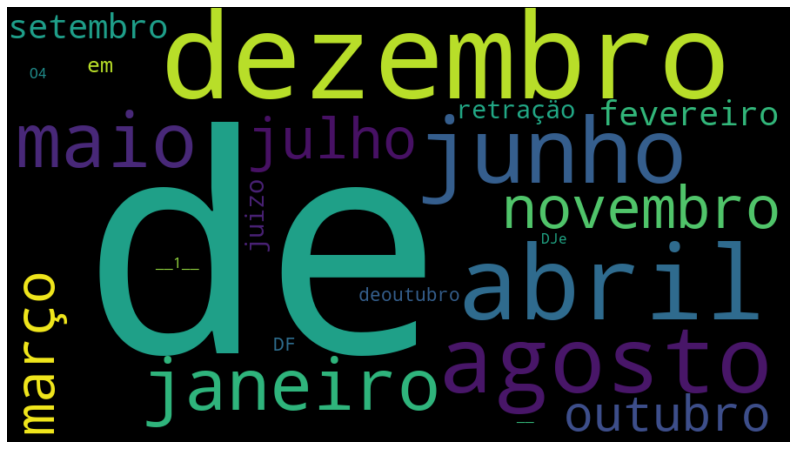

Entidades do tipo: LOCAL
          ESPÉRITO SANTO Bairro Independéncia Cachoeiro de Itapemirim/ES     Estado do Espirito Santo                         CNJ N°                   RIO DE JANEIRO       Rio de Janeiro Apelaçäo Civel             EJNSUOO - G0968B-C-|8pL-0-E9-8CBLZS   Rio de Janeiro         Rio de Janeiro                         Rio de Janeiro Apelaçäo Civel/Reexame Necessärio ES Alteraçôes                                                                                                       Brasilia DF                                                                                     PIS                         Brasilia DF                                                                                                                                                                         Brasilia DF                                                                                                                                                                                     

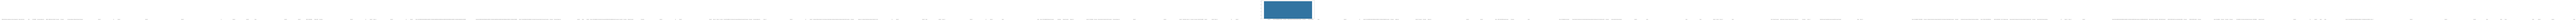

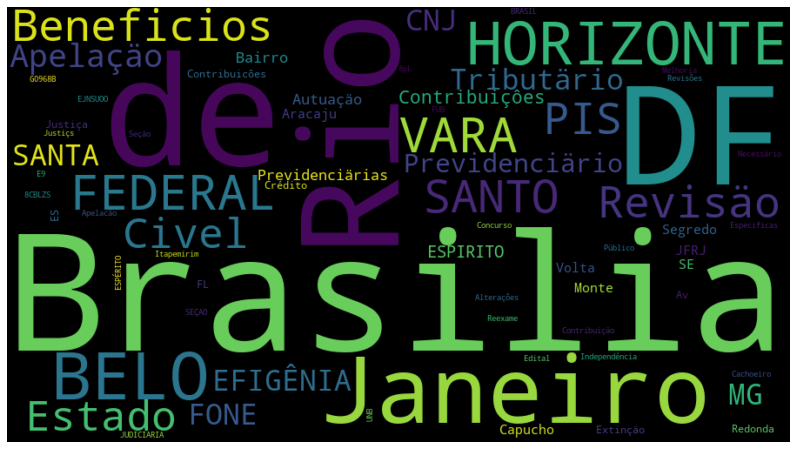

Entidades do tipo: ORGANIZACAO
ESPÎRITO SANTO 22 VARA FEDERAL DE CACHOEIRO DE ITAPEMIRIM INCRA-INSTITUTO NACIONAL DE COLONIZACAO E REFORMA AGRARIA RÉ         TRF VARA FEDERAL DE CACHOEIRO DE ITAPEMIRIM Avenida Monte Castelo     Tribunal Regional Federal           INSTITUTO NACIONAL DE COLONIZAÇAO E REFORMA AGRARIA     TRF INCRA-INSTITUTO NACIONAL DE COLONIZACAO ES TRF2   8° Turma Especializada INCRA-INSTITUTO NACIONAL DE COLONIZACAO ES TRF2     Turma Especializada Pâägina 003 INCRA-INSTITUTO NACIONAL DE COLONIZACAO TRF2   TRF2     TRF2 Caixa Economica Federal CEF INSTITUTO NACIONAL DE COLONIZACAO E REFORMA AGRARIA   TURMA ESPECIALIZADA Pâägina 006 INSTITUTO NACIONAL DE COLONIZACAO E REFORMA AGRARIA CACHOEIRO DE ITAPEMI Vara CACHOEIRO DE ITAPEMI Vara CACHOEIRO DE ITAPEMI Vara CACHOEIRO DE ITAPEMI Vara CACHOEIRO DE ITAPEMI Vara CACHOEIRO DE ITAPEMI Vara CACHOEIRO DE ITAPEMI Vara TRF2   TRF TRF2 Secretaria da 8° Turma Especializada   8° Turma Especializada           TRF2 TRIBUNAL REGIONAL

ValueError: Image size of 163648x414 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1440x504 with 1 Axes>

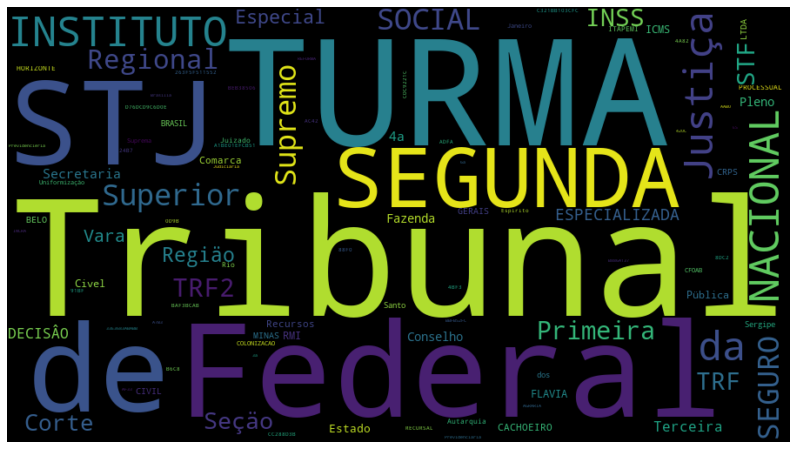

Entidades do tipo: JURISPRUDENCIA
N° 0011030-40.1998.4.02.5002 98.0011030-5   processo n° 0103334- 96.2014.4.02.5002       Processo n° 0011030-40.1998.4.02.5002 98.0011030-5                         CNJ N°   2014.00.00.102689-8                       2008.02.01.012994-2 CNJ N° 0012994-87.2008.4.02.0000                   Processo n° 0011030-40.1998.4.02.5002 1998.50.02.011030-2         Processo n° 0011030-40.1998.4.02.5002 1998.50.02.011030-2                                     RECURSO ESPECIAL N° 1.614.414 - RS 2016/0186938-8                             RE N° 626.489   REsp 1.309.529     RE 626.489                     Recurso Especial Representativo da Controvérsia 1.309.529/PR             1.612.818/PR                       RECURSO ESPECIAL N° 1.608.134 - RS 2016/0160967-2                                             AgRg no REsp 1266921/RS AgRg no AREsp 110.072/PR AgRg no REsp 1.167.494/PR     AgRg no REsp 1.555.257/RS EDcl no AgRg no REsp 1.124.215/SP       Agint no AREsp 589.459/RJ    

ValueError: Image size of 125036x414 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1440x504 with 1 Axes>

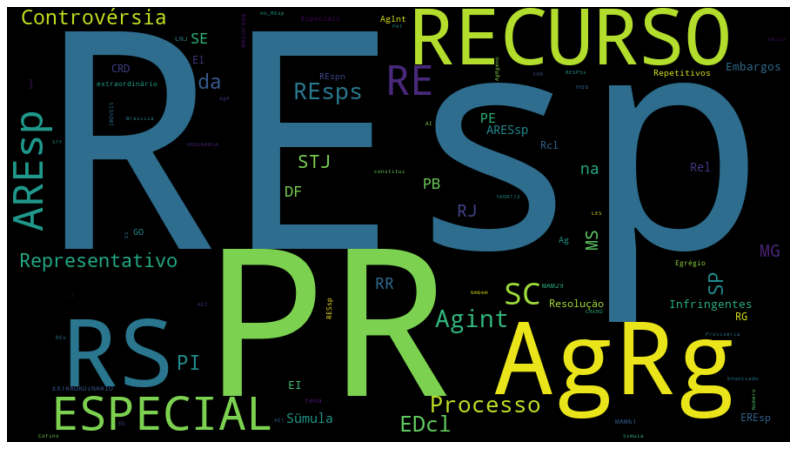

Entidades do tipo: LEGISLACAO
                                      184 CF/88               184 CF/88                         184 CF/88     Portaria n° 08/2008     1° da Lei 11.419/2006   Portaria n° 08/2008     1° da Lei 11.419/2006                         184 CF/88           SARTIGO 103 , CAPUT DA LEI 8.213/1991   ARTIGO 1.036 , & 50 , DO CPC/2015 EMENDA REGIMENTAL 24|DO RISTJ   105 , II , a da Constituiçäo Federal     543-C , 8 79 IL E 543-B , 830 DO CPC               103 da Lei 8.213/1991 Medida Proviséria 1.523-9/ 1997 Lei 9.528/ 1997     Art.1° $ 2° inciso Ill da Lei 11.419/2006 Lei n° 8.213/91 Medida Proviséria n° 1.523-9/ 1997                 Lei 9.528/97     Art.1° $ 2° inciso Ill da Lei 11.419/2006   103 da Lei 8.213/91 Emendas Constitucionais 20/1998 41/2003         1.036 , 8 50. do CPC   Art.1° $ 2° inciso Ill da Lei 11.419/2006   1.036 , 8 50. do CPC       Art.1° $ 2° inciso Ill da Lei 11.419/2006     1.021 do CPC   arts . 1.036 a 1.041 do Côdigo de Processo Civil Regiment

ValueError: Image size of 240338x414 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1440x504 with 1 Axes>

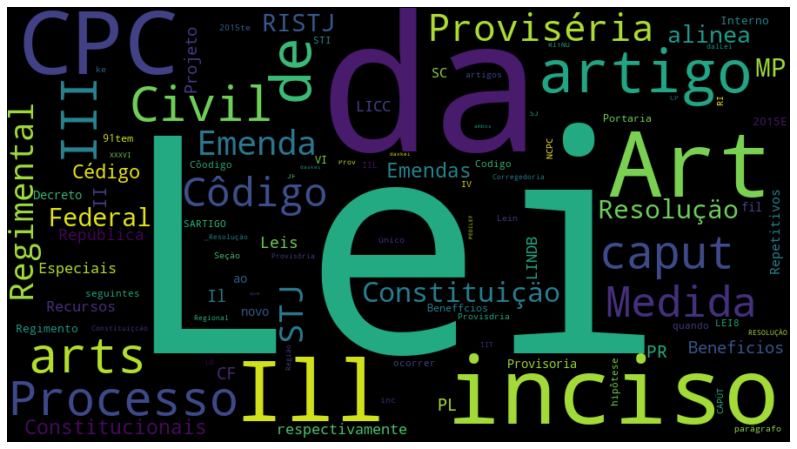

In [45]:
for column in df_entities.columns:
    print("Entidades do tipo: " + column)
    print(generate_freq_dist_plot(df_entities[column]))
    generate_wordcloud(df_entities[column])

In [43]:
print(time_bag[:100])
print(df_entities['TEMPO'][:100].str.cat(sep=" "))
words_that_apper_the_most = pd.Series(
    df_entities['TEMPO'][:100].str.cat(sep=" ")).value_counts().nlargest(20)

[' ', ' ', ' ', '24 de abril de 2015', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '24 de abril de 2015', ' ', '19/05/2015', '13/05/2015 01.06.04', ' ', ' ', '15341104761 19/05/2015 18/07/2014 02.16.03', ' ', '15341104761', '16/04/2015 19/05/2015', ' ', '15341104761 19/05/2015 01.06.04', ' ', ' ', '15341104761 19/05/2015', '24/02/1999', '06/04/2000 01.06.04', ' ', '18/08/2008 19/05/2015 01.06.04', ' ', '15341104761 19/05/2015 13 de maio de 2015', '27/04/2015', '19/05/2015', ' ', '01.06.04', ' ', ' ', ' ', '0258941189 15341104761', ' ', '21 de maio de 2015', ' ', ' ', '15341104761', ' ', '21 de maio de 2015', ' ', ' ', '15341104761', ' ', ' ', ' ', ' ', ' ', ' ', '27/04/2015', '19/05/2015', '22/05/2015', '22/05/2015 22 de maio de 2015 01.06.04', '22/05/2015', ' ', '15341104761', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '15/12/2016 2115 19/12/2016', '1 de agosto de 1997', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '2